In [119]:
import pandas as pd

In [120]:
df = pd.read_csv('penguins_size.csv')
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [121]:
df = df.dropna()  # drop rows with missing values

In [122]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Body Mass (g)')

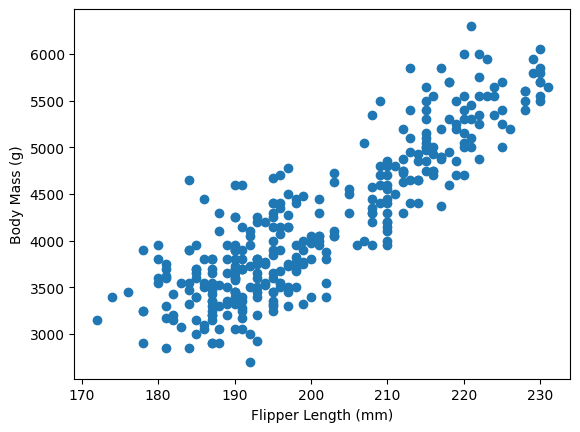

In [123]:
x = df['flipper_length_mm']
y = df['body_mass_g']
plt.scatter(x, y)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

Text(0, 0.5, 'Culmen Length (mm)')

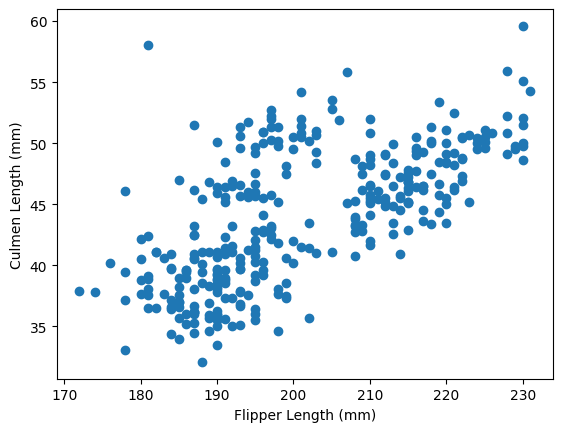

In [124]:
x = df['flipper_length_mm']
y = df['culmen_length_mm']
plt.scatter(x, y)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Culmen Length (mm)')

In [125]:
df_species = df['species'] # take the species column
species_counts = df_species.value_counts() # count occurrences of each species
species_counts

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

In [126]:
Adele_df = df[df['species'] == 'Adelie']
Gento_df = df[df['species'] == 'Gentoo']
Chinstrap_df = df[df['species'] == 'Chinstrap']

Text(0, 0.5, 'Culmen Length (mm)')

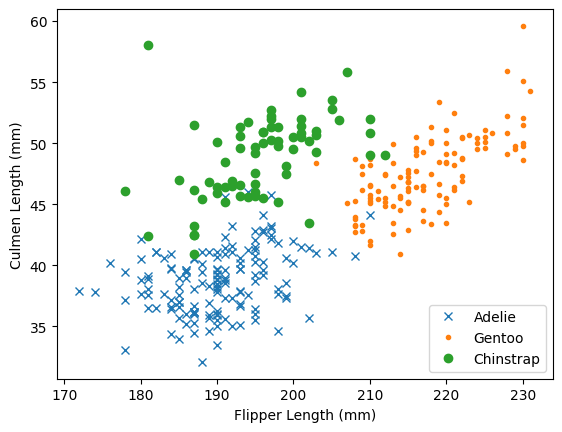

In [127]:
plt.plot(Adele_df['flipper_length_mm'], Adele_df['culmen_length_mm'], 'x', label='Adelie')
plt.plot(Gento_df['flipper_length_mm'], Gento_df['culmen_length_mm'], '.', label='Gentoo')
plt.plot(Chinstrap_df['flipper_length_mm'], Chinstrap_df['culmen_length_mm'], 'o', label='Chinstrap')
plt.legend()
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Culmen Length (mm)')

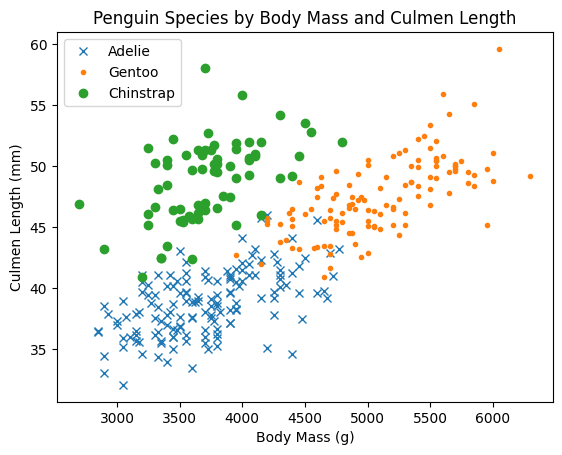

In [128]:
plt.plot(Adele_df['body_mass_g'], Adele_df['culmen_length_mm'], 'x', label='Adelie')
plt.plot(Gento_df['body_mass_g'], Gento_df['culmen_length_mm'], '.', label='Gentoo')
plt.plot(Chinstrap_df['body_mass_g'], Chinstrap_df['culmen_length_mm'], 'o', label='Chinstrap')
plt.legend()
plt.xlabel('Body Mass (g)')
plt.ylabel('Culmen Length (mm)')
plt.title('Penguin Species by Body Mass and Culmen Length')
plt.show()

In [129]:
# map the species to numerical values
df['species_n'] = df['species'].map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2})
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_n
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0


In [130]:
X = df[['flipper_length_mm', 'body_mass_g']]
y = df['species_n']

In [131]:
X

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0
...,...,...
338,214.0,4925.0
340,215.0,4850.0
341,222.0,5750.0
342,212.0,5200.0


In [132]:
y

0      0
1      0
2      0
4      0
5      0
      ..
338    1
340    1
341    1
342    1
343    1
Name: species_n, Length: 334, dtype: int64

In [133]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [134]:
from random import randint 
randint(0, 100)

95

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
model  = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [138]:
# get all predictions
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Penguin Species Predictions on Test Set')

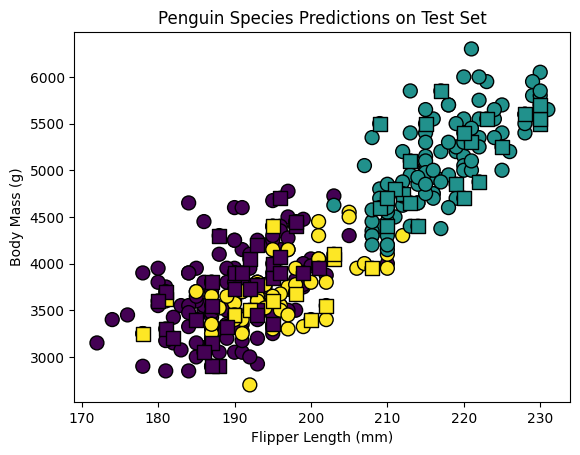

In [139]:
plt.scatter(df['flipper_length_mm'], df['body_mass_g'], c=df['species_n'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(X_test['flipper_length_mm'], X_test['body_mass_g'], c=y_pred, cmap='viridis', marker='s', edgecolor='k', s=100)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Penguin Species Predictions on Test Set')

Text(0.5, 1.0, 'Penguin Species Predictions on Test Set')

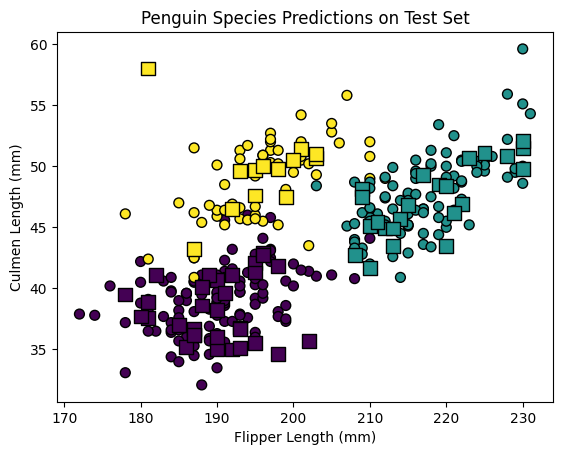

In [140]:
# repeat all for flipper_length_mm and culmen_length_mm
X = df[['flipper_length_mm', 'culmen_length_mm']]
y = df['species_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model  = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(df['flipper_length_mm'], df['culmen_length_mm'],c=df['species_n'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(X_test['flipper_length_mm'], X_test['culmen_length_mm'], c=y_pred, cmap='viridis', marker='s', edgecolor='k', s=100)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Culmen Length (mm)')
plt.title('Penguin Species Predictions on Test Set')

In [141]:
model.predict([[220, 50]])

c:\Users\Lenovo\miniconda3\envs\web\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])